# PHY68 Project 4: Oscillator

By Phillip Roos and Won Kim

### Library Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

### Set-Up

#### Obtaining Data from CSV File

In [2]:
time_vec = []

plt.style.use('ggplot') # plot formatting

csv_filename = 'Data.txt'
data_headers = []
accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z = [], [], [], [], [], []

with open(csv_filename, newline='') as csvfile:
    
    csvreader = csv.reader(csvfile, delimiter=",")
    
    for row in csvreader:
        if data_headers == []:
            data_headers = row
            continue
            
        time_vec.append(float(row[0]))
        accel_x.append(float(row[1]))
        accel_y.append(float(row[2]))
        accel_z.append(float(row[3]))
        gyro_x.append(float(row[4]))
        gyro_y.append(float(row[5]))
        gyro_z.append(float(row[6]))

#### Calibrating Acceleration and Gyroscopic Data

In [3]:
accel_factor = ((2.0**15.0) - 1.0) / 2.0 # conversion using sensitivity (+- 2g)
gyro_factor = ((2.0**15.0) - 1.0) / 250.0 # conversion using sensitivity (250 deg/sec)
time_vec = np.divide(time_vec, 1000.0) # correct for milliseconds -> seconds
samp_rate = len(time_vec) / (time_vec[-1] - time_vec[0]) # psuedo sample rate

accel_x = np.array(accel_x) / accel_factor
accel_y = np.array(accel_y) / accel_factor
accel_z = np.array(accel_z) / accel_factor

gyro_x = np.array(gyro_x) / gyro_factor
gyro_y = np.array(gyro_y) / gyro_factor
gyro_z = np.array(gyro_z) / gyro_factor

cal_start = 0 # start calibration point
cal_end = 100 # end calibration point

# accel calibrations
a_x_cal = accel_x[cal_start:cal_end]
a_y_cal = accel_y[cal_start:cal_end]
a_z_cal = accel_z[cal_start:cal_end]

# gyro calibrations
g_x_cal = gyro_x[cal_start:cal_end]
g_y_cal = gyro_y[cal_start:cal_end]
g_z_cal = gyro_z[cal_start:cal_end]

# calculate accel & gyro calibration means
accel_offsets = [np.mean(a_x_cal), np.mean(a_y_cal), np.mean(a_z_cal)]
gyro_offsets = [np.mean(g_x_cal), np.mean(g_y_cal), np.mean(g_z_cal)]

grav_direc = np.argmax(accel_offsets) # location of gravity

# actual calculation of offset (subtracting starting means) 
accel_x = accel_x-accel_offsets[0]
accel_y = accel_y-accel_offsets[1]
accel_z = accel_z-accel_offsets[2]

gyro_x = gyro_x-gyro_offsets[0]
gyro_y = gyro_y-gyro_offsets[1]
gyro_z = gyro_z-gyro_offsets[2]

### Velocity Conversion

In [4]:
# Convert to velocity
vel_x = np.zeros([len(accel_x)])
vel_y = np.zeros([len(accel_y)])
vel_z = np.zeros([len(accel_z)])

for i in range(len(time_vec) - 1):
    vel_x[i + 1] = vel_x[i] + accel_x[i] * 1e-4
    vel_y[i + 1] = vel_y[i] + accel_y[i] * 1e-4
    vel_z[i + 1] = vel_z[i] + accel_z[i] * 1e-4

### Graphs

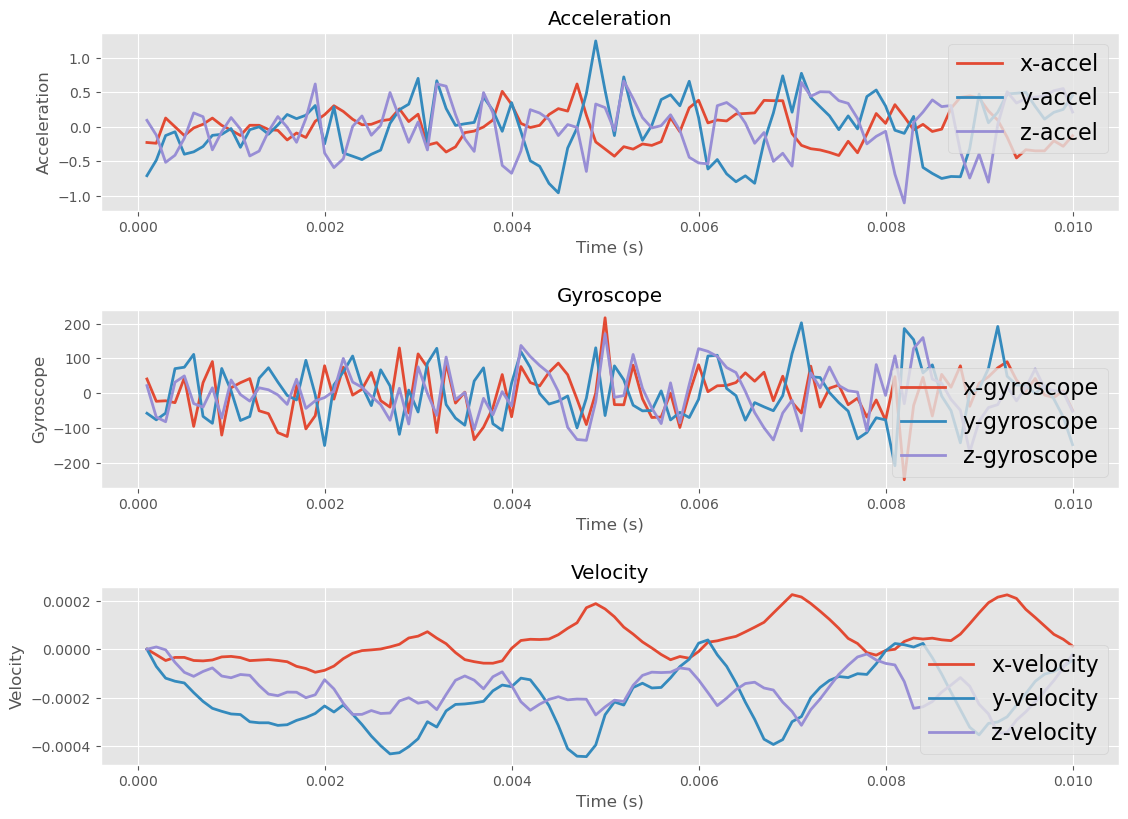

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(12, 9))

fig.tight_layout(pad=5.0)

# Acceleration Graph
ax1 = ax[0] # accel axis
# cmap = plt.cm.Set1
# print('Acceleration')
ax1.set_title("Acceleration")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Acceleration")
ax1.plot(time_vec, accel_x, label='x-accel', linewidth=2)
ax1.plot(time_vec, accel_y, label='y-accel', linewidth=2)
ax1.plot(time_vec, accel_z, label='z-accel', linewidth=2)
ax1.legend(fontsize=16)

# Gyroscope Graph
ax2 = ax[1] # gyro axis
# cmap = plt.cm.tab10
ax2.set_title("Gyroscope")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Gyroscope")
ax2.plot(time_vec, gyro_x, label='x-gyroscope', linewidth=2)
ax2.plot(time_vec, gyro_y, label='y-gyroscope', linewidth=2)
ax2.plot(time_vec, gyro_z, label='z-gyroscope', linewidth=2)
ax2.legend(fontsize=16)
#ax2.set_ylabel('Degrees [$^\circ$]',fontsize=16)

# Velocity Graph
ax3 = ax[2]
# cmap = plt.cm.tab10
ax3.set_title("Velocity")
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Velocity")
ax3.plot(time_vec, vel_x, label='x-velocity', linewidth=2)
ax3.plot(time_vec, vel_y, label='y-velocity', linewidth=2)
ax3.plot(time_vec, vel_z, label='z-velocity', linewidth=2)
ax3.legend(fontsize=16)

plt.show()

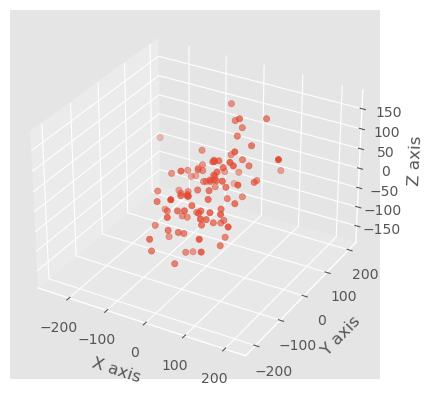

In [7]:
import csv
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# # Open the CSV file
# with open('test_data.csv', 'r') as csvfile:
#     # Read the CSV file
#     csvreader = csv.reader(csvfile)
#     # Skip the header row
#     next(csvreader)
#     # Initialize empty lists for the accelerations of X, Y, Z coordinates
#     x_acc = []
#     y_acc = []
#     z_acc = []

#     # Initialize empty lists for the X, Y, Z coordinates
#     x_coords = []
#     y_coords = []
#     z_coords = []
    
#     # Loop through each row in the CSV file
#     for row in csvreader:
#         # Append the X, Y, Z coordinates to the lists
#         x_coords.append(float(row[4]))
#         y_coords.append(float(row[5]))
#         z_coords.append(float(row[6]))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the X, Y, Z coordinates
ax.scatter(gyro_x, gyro_y, gyro_z)

# Set the labels for the axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the plot
plt.show()

The time step is  0.0025002500250025004


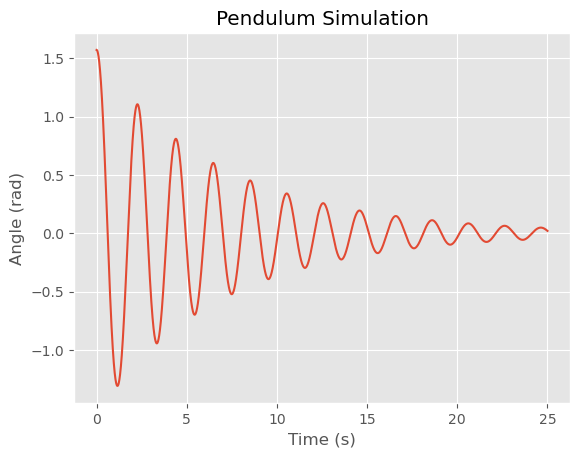

In [14]:
# IMPORTS
import numpy as np 
import matplotlib.pyplot as plt
import math

# ======================
# SETUP
# ======================

end_time = 25 #seconds
steps = 10000 #number of steps between time 0 and end time
gravity = -9.8 #meters per second per second
length = 0.43 #meters
damping = 0.3 # damping coefficient

# ======================
# MY FUNCTIONS
# ======================

def simulate(old_theta, old_vel, dt, damping):
    old_acc = gravity / length * math.sin(old_theta) - damping / length * old_vel
    new_theta = old_theta + old_vel * dt
    new_vel = old_vel + old_acc * dt
    return new_theta, new_vel 

# ======================
# MY SIMULATION
# ======================

# INITIAL CONDITIONS
initial_theta = math.pi/2 #radians
initial_vel = 0 #radians per second

# TIME ARRAY
time = np.linspace(0, end_time, steps)
dt = time[1]-time[0]
print("The time step is ", dt )

# PRE-ALLOCATE ARRAYS FOR ANGULAR POSITION AND ANGULAR VELOCITY
theta = np.empty(np.shape(time))
velocity = np.empty(np.shape(time))
acceleration = np.empty(np.shape(time))

# Set the initial values of the arrays to the initial conditions
theta[0] = initial_theta
velocity[0] = initial_vel
acceleration[0] = gravity / length * math.sin(initial_theta)

# NUMERICAL METHOD ITERATION
for i in range(1,np.size(time)):
    theta[i], velocity[i] = simulate(theta[i-1], velocity[i-1], dt, damping)
    acceleration[i] = gravity / length * math.sin(theta[i]) - damping / length * velocity[i]

# VISUALIZATION
plt.plot(time, theta)
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Pendulum Simulation')
plt.show()